In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

In [2]:
TRAIN_SPLIT = 0.8

%matplotlib inline
file_name = "./data/amazon-fine-food-reviews/Reviews.csv"
df = pd.read_csv(file_name)
len(df)

568454

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
ts = max(df.iloc[:, 7])
print(ts)
time_local = time.localtime(ts)
dt = time.strftime("%Y-%m-%d %H:%M:%S", time_local) 
print(dt)

1351209600
2012-10-26 08:00:00


In [5]:
dt = "2010-01-01 080000"

time_array = time.strptime(dt, "%Y-%m-%d %H%M%S")
timestamp = time.mktime(time_array)
print(timestamp)

1262304000.0


In [6]:
df = df[df['Time'] > timestamp]
len(df)

447702

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...


In [8]:
df = df[['Id', 'Summary', 'Text', 'Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator']]
df.columns = ['Id', 'Summary', 'Text', 'Score', 'VotesHelpful', 'VotesTotal']

In [9]:
df.head()

,Id,Summary,Text,Score,VotesHelpful,VotesTotal
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,1,1
1,2,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,0,0
3,4,Cough Medicine,If you are looking for the secret ingredient i...,2,3,3
4,5,Great taffy,Great taffy at a great price. There was a wid...,5,0,0
5,6,Nice Taffy,I got a wild hair for taffy and ordered this f...,4,0,0


In [10]:
df.describe()

,Id,Score,VotesHelpful,VotesTotal
count,447702.000000,447702.000000,447702.000000,447702.000000
mean,284962.806268,4.142841,1.261576,1.647216
std,164000.490896,1.338869,5.963625,6.457631
min,1.000000,1.000000,0.000000,0.000000
25%,142391.250000,4.000000,0.000000,0.000000
50%,285502.500000,5.000000,0.000000,0.000000
75%,427090.750000,5.000000,1.000000,2.000000
max,568454.000000,5.000000,580.000000,593.000000


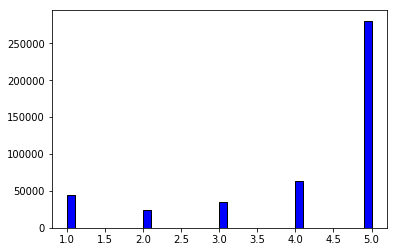

In [11]:
plt.hist(df['Score'], bins=40, facecolor="blue", edgecolor="black")
plt.show()

We can clearly see that most consumers give score 5 if they think the food is good. 

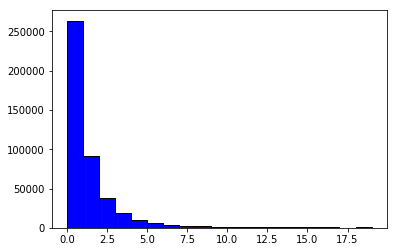

In [12]:
plt.hist(df['VotesHelpful'], range(0, 20), facecolor="blue", edgecolor="black")
plt.show()

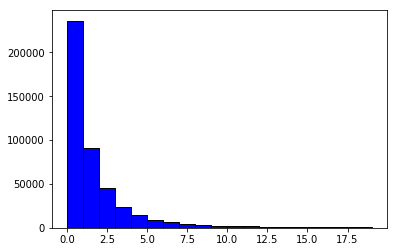

In [13]:
plt.hist(df['VotesTotal'], range(0, 20), facecolor="blue", edgecolor="black")
plt.show()

In [14]:
df["Sentiment"] = df["Score"].apply(lambda score: "positive" if score > 4 
                  else ("neutral" if score > 3 else "negative"))
df["Usefulness"] = (df["VotesHelpful"] / df["VotesTotal"]).apply(
                  lambda p: "useful" if p > 0.5 else "useless")
df = df[['Id', 'Summary', 'Text', 'Sentiment', 'Usefulness']]
df = df[df['Sentiment'] != 'neutral']

In [15]:
df.to_csv("./data/reviews-after-2010.csv", index=None, header=False)

In [16]:
n = len(df)
random.seed(101)
train = random.sample(range(n), int(n * TRAIN_SPLIT))
test = list(set(range(n)) - set(train))

In [17]:
df_train = df.iloc[train]
df_test = df.iloc[test]

In [18]:
df_train.head()

,Id,Summary,Text,Sentiment,Usefulness
451161,451162,A Great Coconut Oil,I love this coconut oil. I use it for cooking ...,positive,useful
151942,151943,Best Coffee Substitute Yet,This has the closest flavor we've yet found to...,positive,useful
419107,419108,Great coffee,Great tasting coffee with a real nice aroma. ...,positive,useless
280167,280168,LABEL IS MISLEADING,I purchased this honey believing the the Bio-A...,negative,useful
363558,363559,Best Chili mix!,This chili mix makes THE best chili I've had. ...,positive,useless


In [19]:
df_test.head()

,Id,Summary,Text,Sentiment,Usefulness
388351,388352,My cats can't get enough of them,It took me a while to find treats that my cats...,positive,useless
195612,195613,Dogs Love Them!,Very cute. The dogs loved the taste and humans...,positive,useless
4,5,Great taffy,Great taffy at a great price. There was a wid...,positive,useless
388352,388353,The Cat loves these things,"My daughter moved in with her cat. Some how, w...",positive,useless
388354,388355,Absolutely Flawlessly Delicious! I would pay ...,These candies are flat out delicious! I've rea...,positive,useful


In [20]:
df_train.to_csv("./data/reviews-after-2010-train.csv", index=None, header=False)
df_test.to_csv("./data/reviews-after-2010-test.csv", index=None, header=False)